<a href="https://colab.research.google.com/github/Oukey/M_L/blob/master/myML1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Занятие 3. Практический пример: один нейрон**

https://vk.com/lambda_brain

Учимся работать с датасетами, хранящимися в файлах.

Разбираем, как решить задачу "Яблоки и Груши" с помощью нашего шаблона из предыдущего занятия и "нейронной сети" из одного нейрона.


##**Как загружать датасеты из файла**

Прежде всего изучим, как в наш проект загружать большие объёмы данных. Довольно часто исходные выборки накапливаются автоматически (или вводятся вручную) в сыром виде в базах данных, затем промежуточно очищаются (или это происходит перед их загрузкой в базу), и далее экспортируются в текстовый файл в каком-то стандартном формате (чаще всего CSV).

И в реальных проектах, и в учебных на крупных ресурсах наподобие kaggle.com входные данные обычно поставляются в виде таких файлов, поэтому важно научиться загружать их в свой проект, в ноутбук. 

Воспользуемся датасетом "Яблоки и Груши" из занятия
https://github.com/DLSchool/dlschool/tree/master/05.%20Neuron%2C%20OOP

Это обычный текстовый файл, первая строчка которого -- названия трёх столбцов, и далее идут сами данные. Сперва два признака: желтизна (0..1) и симметричность (0..1), и затем класс, тип объекта (1 -- груши, 0 -- яблоки).

Есть три классических подхода, как организовать доступ к датасетам в виде файлов: 

1) указать прямую ссылку на файл в интернете (самый простой способ, но не очень оперативный, если этот файл будет часто обновляться), 

2) загружать файл в ноутбук локально (потребуется каждый раз делать это вручную при запуске ноутбука), 

3) хранить файл в облаке, например на Google Drive (нужно повозиться с процессом авторизации).

Описание каждого из способов:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

Пока воспользуемся первым способом. Прямая ссылка на наш датасет (нужен именно raw-файл!) будет такая:

https://media.githubusercontent.com/media/DLSchool/dlschool/master/05.%20Neuron%2C%20OOP/data/apples_pears.csv

Теперь требуется данные из этого файла загрузить в программу. Для этого воспользуемся популярной библиотекой pandas, и попутно подключим пакет matplotlib, ответственный за рисование графиков. 


Своя ссылка: https://raw.githubusercontent.com/Oukey/M_L/master/data/apples_pears.csv

In [0]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

from matplotlib import pyplot as plt
import pandas as pd

cuda


In [0]:
# загружаем данные из сети:
#data = pd.read_csv("https://media.githubusercontent.com/media/DLSchool/dlschool/master/05.%20Neuron%2C%20OOP/data/apples_pears.csv")
data = pd.read_csv("https://raw.githubusercontent.com/Oukey/M_L/master/data/apples_pears.csv")
data.head() # проверяем, правильно ли загрузилось

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


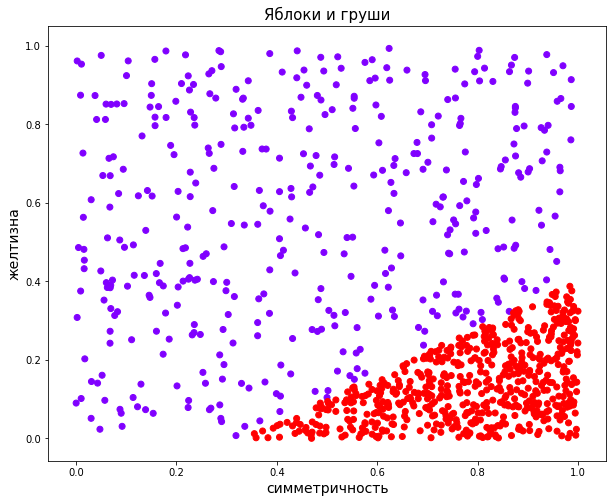

In [0]:
# выводим даннные в виде графика

plt.figure(figsize=(10, 8)) # пропорции графика

# первые два параметра -- координаты x,y каждой точки, 
# в качестве которых берутся значения двух первых столбцов data;
# c -- цвет каждой точки, который определяется третьим столбцом (класс, яблоко или груша)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')

plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Как видно, все данные чётко разделены по классам, и в принципе не так сложно вручную запрограммировать функцию прогноза, которая будет классифицировать все точки по двум классам (говорят, что такая выборка линейно разделима). Однако на практике конечно данные перемешиваются гораздо менее чётко, а признаков значительно больше, поэтому процесс классификации желательно автоматизировать. Лучше всего с этим справляются сегодня нейронные сети.


---



##**Как работает специалист по машинному обучению**

Мы подходим, пожалуй, к ключевому моменту во всём процессе обучения -- как минимум, его важно понимать.

У нас есть готовый шаблон, который мы сейчас применим для анализа данной выборки. Главный вопрос на данный момент -- а какую, собственно, последовательность моделей (скорее всего, стандартных) нам задавать в nn.Sequential, чтобы получить достаточно точный прогноз?

В этом по сути и заключается мастерство специалиста Data Science. 

Во-первых, нужно **хорошее знание соответствующих алгоритмов**, соответствующих моделей PyTorch, чтобы правильно их комбинировать, подчас проявляя интуицию. 

Во-вторых, **нужен также опыт**, практика в правильном подборе моделей, для чего надо просто больше тренироваться на самых разных датасетах. 

В-третьих, в идеале **нужно хорошее знание профильной математики**. 

В четвёртых, **нужно при необходимости уметь самостоятельно придумывать и программировать модели**, наиболее точно подходящие конкретной задаче.

В пятых, **нужно уметь работать с большими массивами данных, уметь эффективно их обрабатывать, очищать, готовить для обработки моделями**.

В шестых, **нужно уверенно владеть библиотеками  визуализации сложных и крупных наборов данных**.

И в седьмых, требуется **бесконечное терпение**: машинное обучение это постоянное экспериментирование.

Тут не существует однозначного пути к решению, как в классическом программировании. То, что приходится на долю ML-специалиста -- это тоже оптимизация, которую пока не удаётся автоматизировать. Пробуем разные подходы, комбинации разных моделей, настраиваем параметры, изучаем, что нового появилось, и постоянно экспериментируем, ищем узкий путь методом проб, ошибок и находок.


##**Типовая схема решения задачи машинного обучения**

Пока мы займёмся изучением самой схемы решения стандартной задачи в целом -- с нуля, от постановки (входной датасет с яблоками и грушами), и до результата (модель, правильно классифицирующая входные данные). 

Поэтому на данном этапе предположим, что вы уже правильно выбрали последовательность нужных моделей. Их две:

-- уже знакомая нам Linear, на входе которой два признака, а на выходе один, 

-- так называемый сигмоид Sigmoid (см. ниже про логистическую регрессию).

```
torch.nn.Sequential(
    Linear(2, out_features=1),
    Sigmoid()
)
```


Выполним подготовительную работу:

In [0]:
# импортируем нужные библиотеки
import torch
import numpy as np # всегда пригодится :)
from torch.nn import Linear, Sigmoid

# инициализируем девайс
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# добавляем типовую функцию "шаг обучения"
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step



Посмотрим на наш исходный универсальный шаблон решения из предыдущего занятия. Пока всё в нём понятно, кроме момента, какие тензоры подавать нашему шагу обучения train_step()?

Просто выделим их слайсами из нашего датасета, и приведём к формату тензоров:


In [0]:
X = torch.FloatTensor(data.iloc[:,:2].values)  # матрица (два признака)

# класс/тип объектов (столбец из нулей и единиц) 
y = torch.FloatTensor(data['target'].values.reshape((-1, 1))) # сжимаем до одного измерения 

# в датасете тысяча точек
print(X.data.shape, y.data.shape)

torch.Size([1000, 2]) torch.Size([1000, 1])


Тогда наша модель запишется в конечном виде так (обратите внимание, что мы в ней настроили по сути лишь структуру нашей модели neuron, одну команду!). Попутно сравните наш вариант решения с решением DLSchool. 

In [0]:
from torch import optim, nn

neuron = torch.nn.Sequential(
    Linear(2, out_features=1),
    Sigmoid()
)
print(neuron.state_dict())

lr = 0.1
n_epochs = 1000
loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.SGD(neuron.parameters(), lr=lr)
train_step = make_train_step(neuron, loss_fn, optimizer)

for epoch in range(n_epochs):
    loss = train_step(X, y)
    
print(neuron.state_dict())
print(loss)

OrderedDict([('0.weight', tensor([[ 0.4699, -0.6238]])), ('0.bias', tensor([-0.1229]))])
OrderedDict([('0.weight', tensor([[ 2.2575, -3.1279]])), ('0.bias', tensor([-0.1894]))])
0.09127789735794067


После тысячи эпох лосс будет плавать в районе 0.1 -- это слабоватый результат. Увеличьте количество эпох до 10000, ошибка снизится примерно до 0.04.

##**Красивый вывод результата**

Навык красивого, визуального, интуитивно понятного решения -- очень важный, наверное даже почти такой же важный, как и навык правильного подбора моделей. Как инженер решает задачу, заказчику, начальнику, пользователям по большому счёту не интересно, а вот красивая картинка, наглядный результат будет очень важен.

Мы получили обученную модель neuron(), которую теперь можем применять для классификации. Если подать ей на вход исходную выборку, то на выходе мы получим тензор, где каждой входной точке соответствует прогнозируемое значение. 

Если бы наша модель была идеальной, то прогнозы равнялись бы в точности 1 и 0 (как в обучающей выборке). На практике, так как лосс у нас небольшой (ошибка невелика), мы получим значения наподобие 0.997 (1), 0.943 (1), 0.0032 (0) и т. д. Они очевидно делятся на две группы сравнением с 0.5.

И в заключение полученный массив надо выровнять до одного измерения.


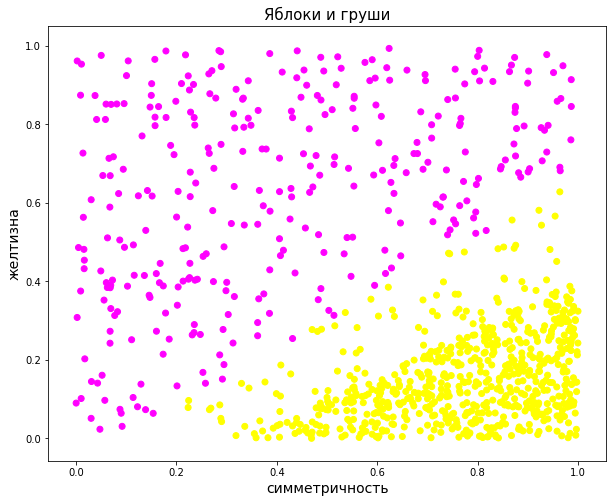

In [0]:
neuro_data = neuron(X)
y2 = neuro_data > 0.5
y2 = y2.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y2, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Согласитесь, что такое представление результата гораздо нагляднее, нежели просто показатель лосса. По картинке сразу видно, подходит ли нам данная обученная модель.



---

**Линейная регрессия** применяется для прогнозирования результата на основании исходных данных. В ряде задач бинарной классификации (например, спам - не спам), когда нужно получить вероятность принадлежности объекта одному из двух классов, применяется **логистическая регрессия**. В некотором смысле она работает как нейронная сеть из одного нейрона -- в её реализациях может применяться например сигмоида, когда значение функции активации плавно меняется с 0 до 1, и небольшие изменения во входных данных вызывают небольшие изменения модели. А вот в перцептроне качественно другая функция активации -- он срабатывает, когда просто превышен порог, и структура модели может меняться сильно и скачкообразно.

Подробнее например тут:
https://github.com/DLSchool/dlschool/tree/master/05.%20Neuron%2C%20OOP



##**Задание**

Пока на нашем графике результата видно, что модель классифицирует яблоки и груши не очень хорошо, включая в яблоки довольно много груш. Этот момент надо исправить.


1) Часто вместо алгоритма оптимизации **SGD** применяется более продвинутый алгоритм **Adam**. Найдите в документации по PyTorch этот алгоритм и используйте его вместо SGD. Он работает значительно эффективнее: уже после 1000 эпох лосс составит около 0.015.

А может быть, вам получится сделать и ещё более эффективное решение? Попробуйте поэкспериментировать например с разными функциями активации (посмотрите ноутбук из пункта 6 занятия DLSchool по последней ссылке).

2) Постройте график зависимости лосса от количества эпох.


---

Сейчас мы работали с датасетом, данные в котором хотя и реальные, однако они достаточно просто разделяются линейно, и тут хорошо работает фактически любая бинарная классификация.  В следующем занятии мы изучим, что делать, если признаков больше двух, и значения этих признаков ощутимо перемешаны друг с другом.

#Решение:

In [19]:
import torch
import numpy as np
import pandas as pd
from torch import optim, nn
from torch.nn import Linear, Sigmoid
from matplotlib import pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'  # инициализация девайса

'''Загрузка данных из сети'''
data = pd.read_csv("https://raw.githubusercontent.com/Oukey/M_L/master/data/apples_pears.csv")
data.head()

'''Выделение тензоров слайсами'''
X = torch.FloatTensor(data.iloc[:, :2].values)  # мaтрица (два признака)
# класс/тип обхектов (0 or 1)
y = torch.FloatTensor(data['target'].values.reshape((-1, 1)))  # сжатие до одного измерения
print(X.data.shape, y.data.shape)

'''Типовая функция шаг_обучения'''

def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()

    return train_step


lol = nn.Sigmoid()

'''Модель'''
neuron = torch.nn.Sequential(
    Linear(2, out_features=1),
    Sigmoid(),
)
print(neuron.state_dict())

lr = 0.1
n_epochs = 1000
loss_list = []
loss_fn = nn.MSELoss(reduction="mean")
# optimizer = optim.SGD(neuron.parameters(), lr=lr)
# optimizer = optim.Adam(neuron.parameters(), lr=lr)
optimizer = optim.RMSprop(neuron.parameters(), lr=lr)
train_step = make_train_step(neuron, loss_fn, optimizer)

for epoch in range(n_epochs):
    loss = train_step(X, y)
    loss_list.append(loss)

print(neuron.state_dict())
print(loss)

neuro_data = neuron(X)
y2 = neuro_data > 0.5
y2 = y2.data.numpy().reshape(-1)



torch.Size([1000, 2]) torch.Size([1000, 1])
OrderedDict([('0.weight', tensor([[-0.0603,  0.6358]])), ('0.bias', tensor([0.3311]))])
OrderedDict([('0.weight', tensor([[ 25.4530, -41.9453]])), ('0.bias', tensor([-7.6426]))])
0.008461671881377697


##Визуализация

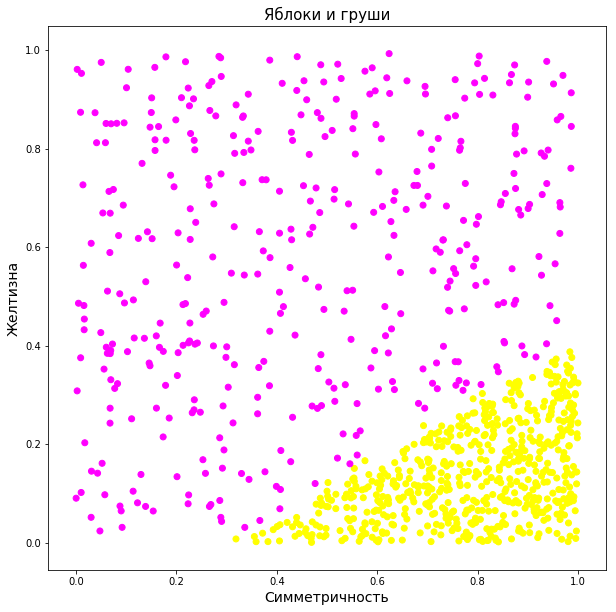

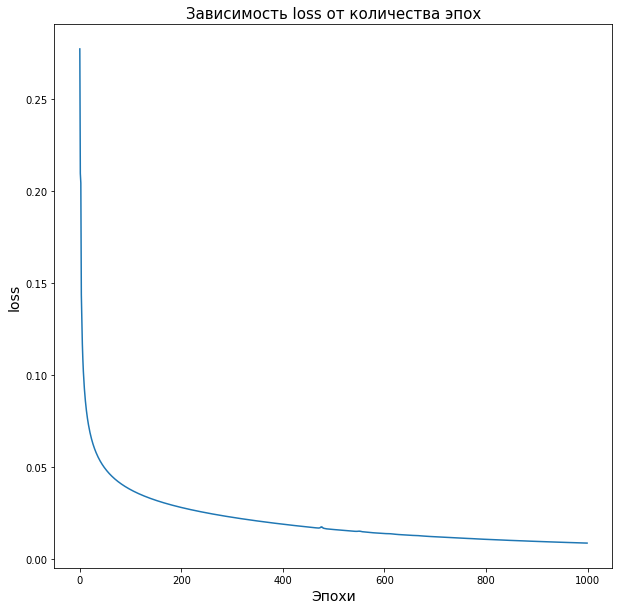

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y2, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('Симметричность', fontsize=14)
plt.ylabel('Желтизна', fontsize=14)
plt.show()

plt.figure(figsize=(10, 10))
plt.title('Зависимость loss от количества эпох', fontsize=15)
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.plot(range(n_epochs), loss_list);
plt.show()
